# Ranqueamento de gêneros de filmes por decada

Esse script tem por objetivo:

### Extração 

1. Ingerir um dataset do IMDB através do Kaggle.com

### Limpeza

2. Executar uma limpeza no dataset mantendo apenas as entradas que são filmes e removendo filmes adultos
3. Efetuar tratamento do campo gêneros para que ele seja mais facilmente ranqueado
4. Organizar os dados por década para facilitar a comparação

### Análise

5. Elaborar análise do melhor gênero por decada através de uma média ponderada do rating pela quantidade de filmes em cada genero e o numero de ratings de cada filme
6. Efetuar o ranquamento de gêneros por decada

### Exibição

7. Plotar gráficos que ajudem na interpretação dessas infos


## Importa dependencias e dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

df_filmes = pd.read_csv(r'dataset\title.basics.tsv',sep="\t")

display(df_filmes)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
...,...,...,...,...,...,...,...,...,...
12083766,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,Drama
12083767,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,Drama
12083768,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,Drama
12083769,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


## Limpeza

### Remover tudo que não é filme e tudo que é filme adulto

In [2]:
df_filmes_tratada = df_filmes[(df_filmes['titleType']=='movie')&(df_filmes['isAdult']==0)]
display(df_filmes_tratada)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,40,"Biography,Drama"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
...,...,...,...,...,...,...,...,...,...
12083665,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
12083689,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
12083701,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
12083711,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama


## Tratamento do campo gênero

O campo gênero está disposto da seguinte forma: caso um filme integre mais de um genero, ele aparece assim "genro1,genero2,genero3,etc" e, para fazer a ponderação posteriormente, precisamos que ele seja explodito transformando esses casos em multiplas entradas repetidas, uma para cada genero.

Após essa separação removeremos tamém os filmes sem nenhum genero (onde o campo genero esta com "\N")

In [3]:
df_filmes_tratada["genres"] = df_filmes_tratada["genres"].str.split(",")   
df_filmes_tratada = df_filmes_tratada.explode("genres")   

df_filmes_tratada = df_filmes_tratada[df_filmes_tratada["genres"]!="\\N"]

display(df_filmes_tratada)


C:\Users\gatra\AppData\Local\Temp\ipykernel_9404\1276752485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filmes_tratada["genres"] = df_filmes_tratada["genres"].str.split(",")


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,Documentary
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,News
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,Sport
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,40,Biography
...,...,...,...,...,...,...,...,...,...
12083665,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
12083689,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
12083701,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
12083711,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama


## Organização da tabela por década

In [4]:
df_filmes_tratada["startYear"] = df_filmes_tratada.apply(lambda row: row["startYear"] if row["startYear"]!='\\N' else 0,axis=1 )
df_filmes_tratada = df_filmes_tratada[df_filmes_tratada["startYear"]!=0]
df_filmes_tratada["startYear"] = df_filmes_tratada["startYear"].astype(int)

df_filmes_tratada["decade"] = ((df_filmes_tratada["startYear"] // 10) * 10).astype(str) + "s"
display(df_filmes_tratada)

C:\Users\gatra\AppData\Local\Temp\ipykernel_9404\4208201216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filmes_tratada["startYear"] = df_filmes_tratada["startYear"].astype(int)
C:\Users\gatra\AppData\Local\Temp\ipykernel_9404\4208201216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filmes_tratada["decade"] = ((df_filmes_tratada["startYear"] // 10) * 10).astype(str) + "s"


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,decade
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,1890s
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,Documentary,1890s
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,News,1890s
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,Sport,1890s
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,40,Biography,1900s
...,...,...,...,...,...,...,...,...,...,...
12083665,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary,2010s
12083689,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary,2000s
12083701,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy,2010s
12083711,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,Drama,2010s


# Análise

## Calcular o rating ponderado por numero de filmes daquele genero e numero de avaliações

### Ingerir a base de ratings

In [5]:
df_ratings = pd.read_csv(r'dataset\title.ratings.tsv',sep="\t")
display(df_ratings)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2184
1,tt0000002,5.5,306
2,tt0000003,6.4,2268
3,tt0000004,5.2,196
4,tt0000005,6.2,3009
...,...,...,...
1603095,tt9916846,5.3,7
1603096,tt9916848,5.2,7
1603097,tt9916850,6.0,7
1603098,tt9916852,5.7,7


### Cruza base de filmes com a base de Ratings 

In [6]:
df_cruzada = df_filmes_tratada.merge(df_ratings,left_on='tconst',right_on='tconst',how='left')
df_cruzada = df_cruzada[pd.notna(df_cruzada['averageRating'])]
df_cruzada


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,decade,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,1890s,5.2,231.0
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,Documentary,1890s,5.3,577.0
2,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,News,1890s,5.3,577.0
3,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,Sport,1890s,5.3,577.0
4,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,40,Biography,1900s,5.5,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
851456,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,History,2010s,4.7,23.0
851457,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,War,2010s,4.7,23.0
851458,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama,2010s,7.6,12.0
851461,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy,2010s,7.7,9.0


### Calcula Média ponderada por gênero (usando votos como peso)

In [7]:

df_grouped = (
    df_cruzada.groupby(["decade", "genres"])
    .apply(lambda x: (x["averageRating"] * x["numVotes"]).sum() / x["numVotes"].sum())
    .reset_index(name="media_ponderada_votos")
)

print(df_grouped)


    decade       genres  media_ponderada_votos
0    1890s  Documentary               4.263690
1    1890s         News               4.873032
2    1890s      Romance               5.200000
3    1890s        Sport               4.773283
4    1900s       Action               5.972467
..     ...          ...                    ...
296  2020s        Sport               6.956707
297  2020s    Talk-Show               6.996337
298  2020s     Thriller               6.268520
299  2020s          War               6.985452
300  2020s      Western               6.470280

[301 rows x 3 columns]


C:\Users\gatra\AppData\Local\Temp\ipykernel_9404\4071533941.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["averageRating"] * x["numVotes"]).sum() / x["numVotes"].sum())


### Ponderando pelo número de filmes no gênero multiplicando pelo fator proporcional



In [8]:
# Conta filmes por gênero e década
contagem_filmes = (
    df_cruzada.groupby(["decade", "genres"])["averageRating"]
    .count()
    .reset_index(name="num_filmes")
)

# Junta com a média ponderada
df_final = df_grouped.merge(contagem_filmes, on=["decade", "genres"])

# Rating final ponderado também pelo número de filmes
df_final["rating_ponderado_final"] = (
    df_final["media_ponderada_votos"] * df_final["num_filmes"]
) / df_final.groupby("decade")["num_filmes"].transform("sum")

display(df_final)

,decade,genres,media_ponderada_votos,num_filmes,rating_ponderado_final
0,1890s,Documentary,4.263690,17,2.684545
1,1890s,News,4.873032,4,0.721931
2,1890s,Romance,5.200000,1,0.192593
3,1890s,Sport,4.773283,5,0.883941
4,1900s,Action,5.972467,2,0.124426
...,...,...,...,...,...
296,2020s,Sport,6.956707,912,0.066153
297,2020s,Talk-Show,6.996337,17,0.001240
298,2020s,Thriller,6.268520,7370,0.481706
299,2020s,War,6.985452,537,0.039113


## Efetuar o ranquamento de gêneros por decada

### Ranqueia por década os gêneros com base na rating_ponderado_final calculado no passo anterior. 

In [9]:

df_final["rank"] = df_final.groupby("decade")["rating_ponderado_final"] \
               .rank(method="dense", ascending=False)

df_final



,decade,genres,media_ponderada_votos,num_filmes,rating_ponderado_final,rank
0,1890s,Documentary,4.263690,17,2.684545,1.0
1,1890s,News,4.873032,4,0.721931,3.0
2,1890s,Romance,5.200000,1,0.192593,4.0
3,1890s,Sport,4.773283,5,0.883941,2.0
4,1900s,Action,5.972467,2,0.124426,10.0
...,...,...,...,...,...,...
296,2020s,Sport,6.956707,912,0.066153,18.0
297,2020s,Talk-Show,6.996337,17,0.001240,24.0
298,2020s,Thriller,6.268520,7370,0.481706,4.0
299,2020s,War,6.985452,537,0.039113,19.0


### Pivota a tabela para que, cada genero se torne uma coluna cujo valor é o ranking naquela decada viabilizando assim a plotagem de um gráfico

In [10]:
df_pivot = df_final.pivot(index="decade", columns="genres", values="rank")
df_pivot

genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,,
1890s,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,3.0,NaN,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1900s,10.0,7.0,NaN,3.0,5.0,NaN,1.0,2.0,15.0,12.0,...,8.0,NaN,16.0,NaN,NaN,4.0,NaN,NaN,9.0,NaN
1910s,6.0,2.0,20.0,15.0,3.0,5.0,13.0,1.0,17.0,11.0,...,22.0,NaN,4.0,16.0,NaN,18.0,NaN,14.0,8.0,7.0
1920s,5.0,3.0,21.0,17.0,2.0,7.0,10.0,1.0,16.0,13.0,...,24.0,NaN,4.0,19.0,23.0,18.0,NaN,14.0,12.0,6.0
1930s,8.0,5.0,22.0,17.0,2.0,4.0,16.0,1.0,12.0,18.0,...,23.0,NaN,3.0,21.0,NaN,19.0,NaN,14.0,11.0,7.0
1940s,11.0,6.0,22.0,17.0,2.0,4.0,19.0,1.0,13.0,16.0,...,NaN,NaN,3.0,21.0,NaN,20.0,NaN,15.0,7.0,5.0
1950s,8.0,5.0,22.0,17.0,2.0,4.0,19.0,1.0,10.0,16.0,...,23.0,NaN,3.0,20.0,NaN,21.0,NaN,11.0,9.0,7.0
1960s,6.0,5.0,20.0,19.0,2.0,4.0,14.0,1.0,10.0,16.0,...,22.0,NaN,3.0,17.0,NaN,21.0,NaN,9.0,7.0,11.0
1970s,3.0,6.0,21.0,17.0,2.0,4.0,9.0,1.0,10.0,12.0,...,23.0,24.0,5.0,18.0,NaN,20.0,NaN,7.0,13.0,16.0


# Exibição 
## Plota um gráfico de linhas exibindo o ranking de cada gênero de filme ao longo das décadas

C:\Users\gatra\AppData\Local\Temp\ipykernel_9404\1549228713.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", num_genres)


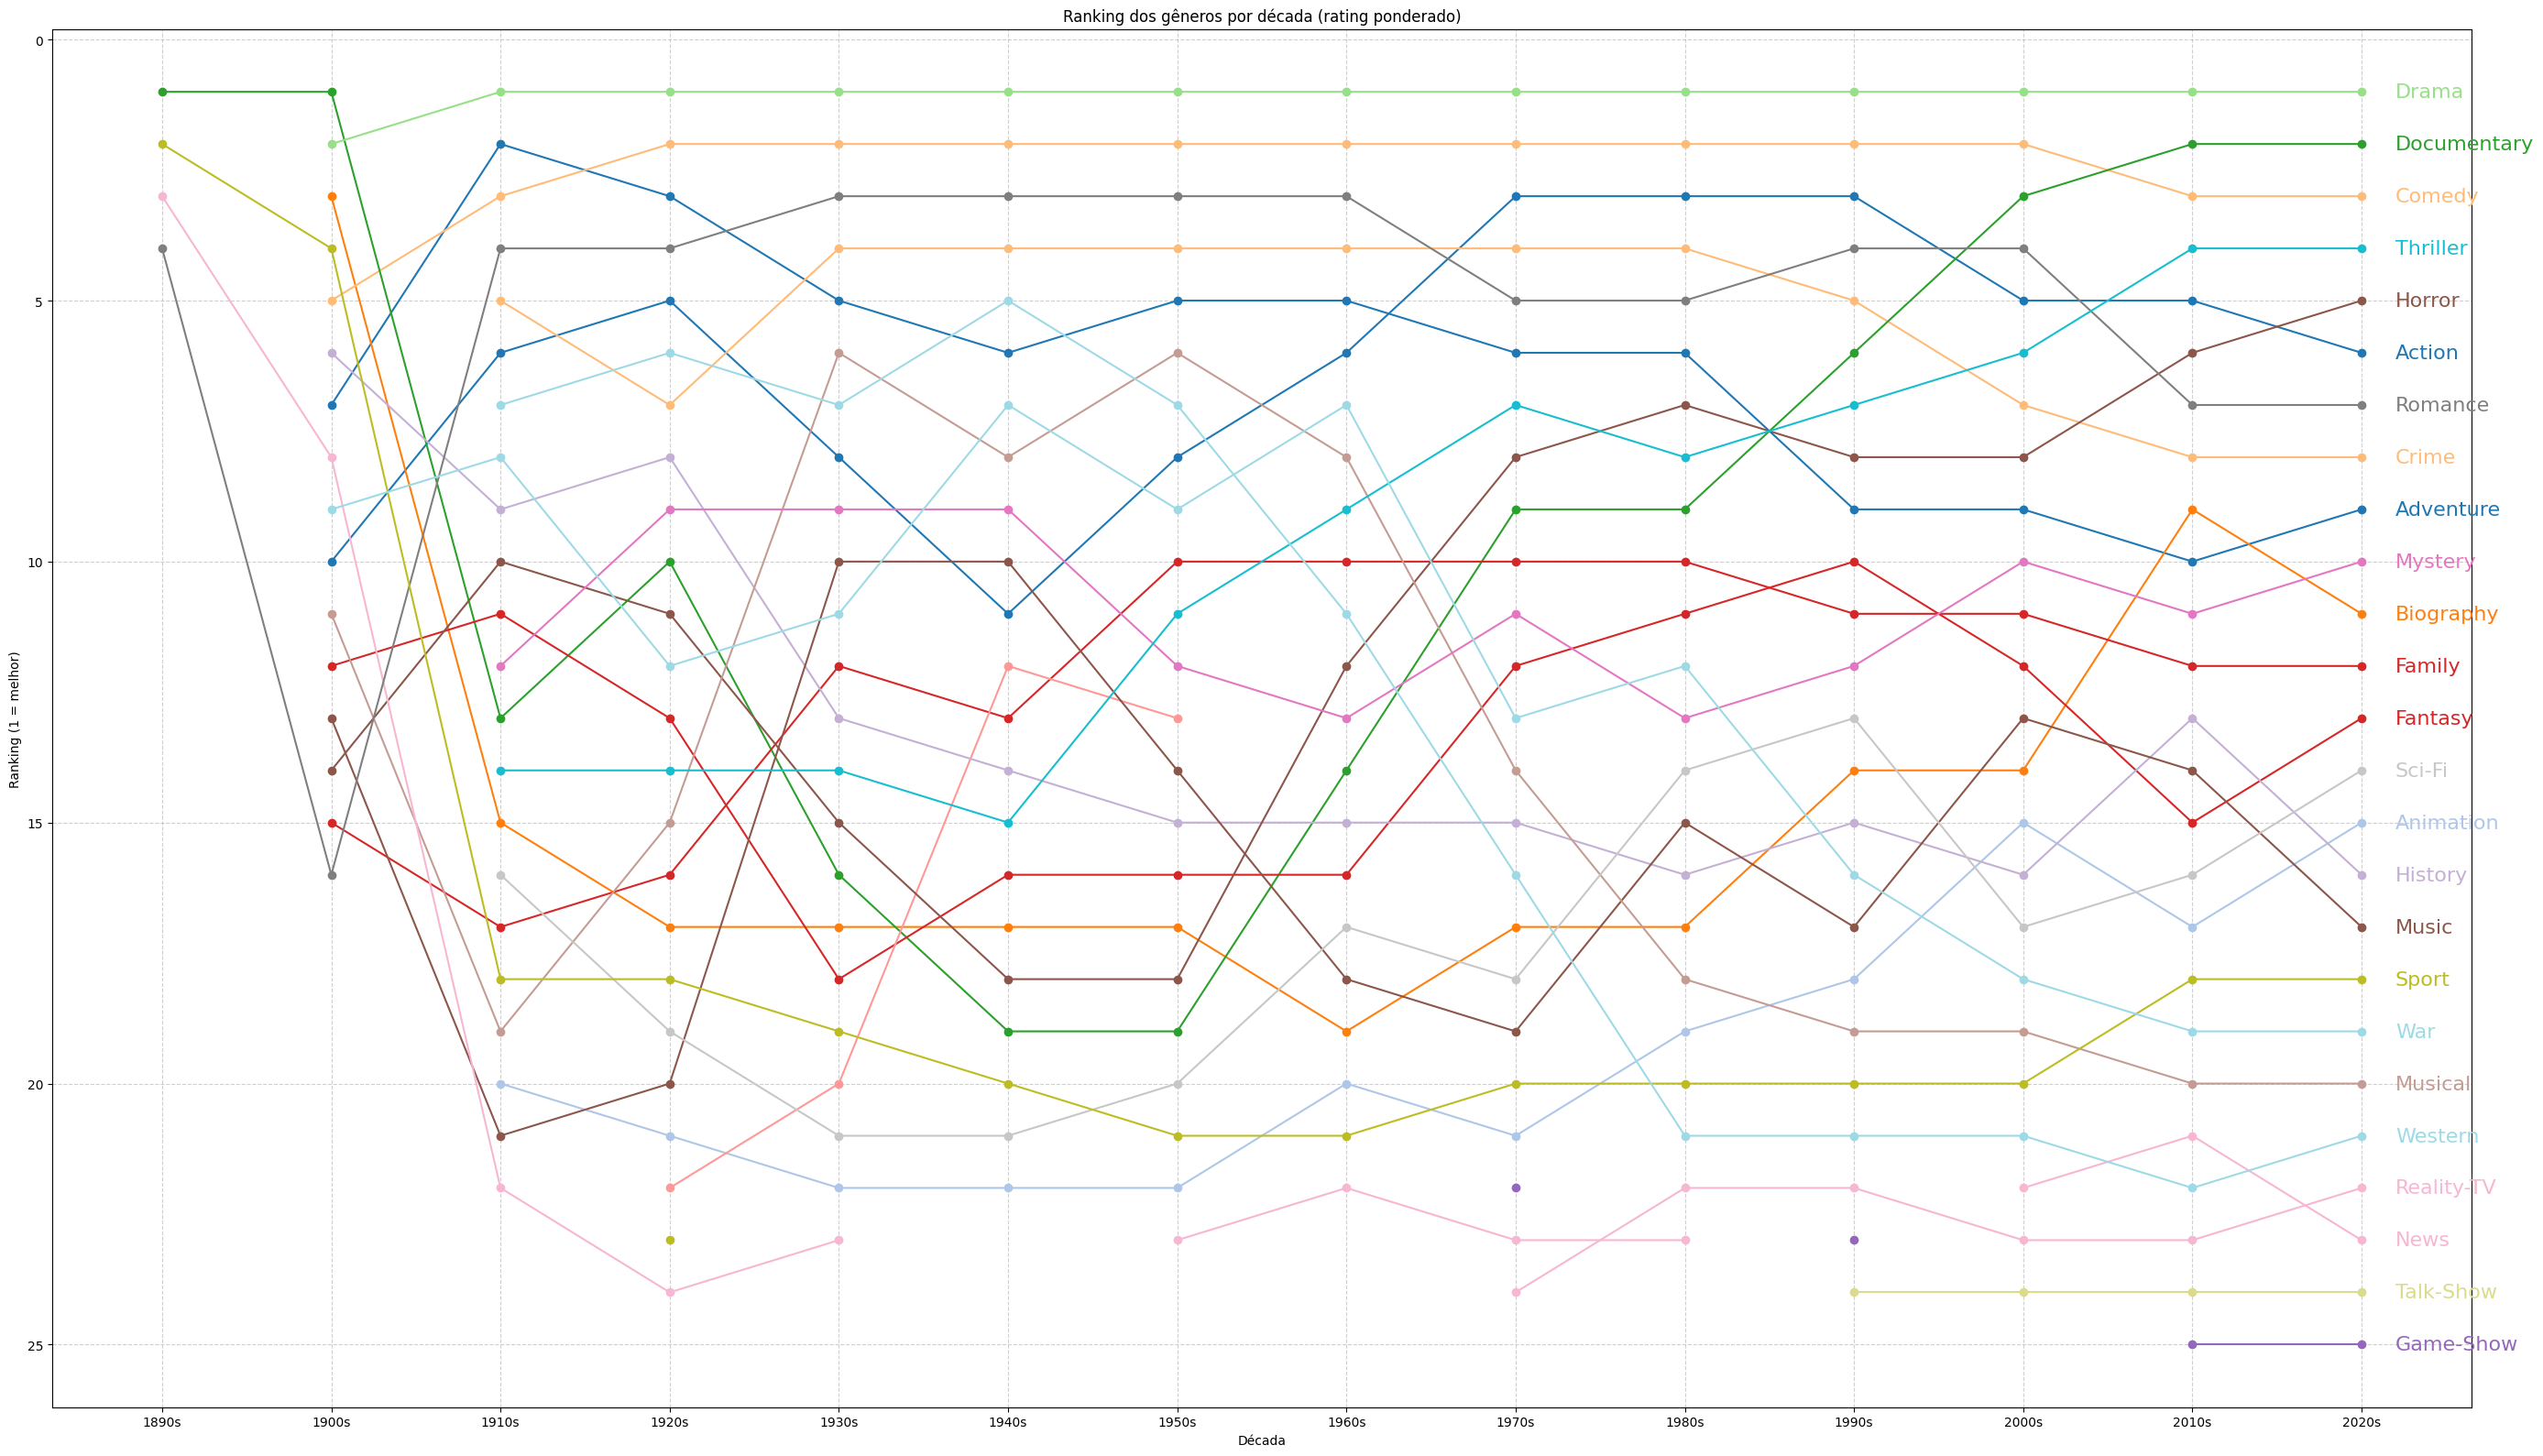

In [11]:

num_genres = len(df_pivot.columns)
cmap = plt.cm.get_cmap("tab20", num_genres)

plt.figure(figsize=(28,16))
for i, genero in enumerate(df_pivot.columns):
    plt.plot(df_pivot.index, df_pivot[genero],
             marker="o",
             color=cmap(i))

    # Get last decade label (string) and its numeric position
    last_decade_label = df_pivot.index[-1]
    last_value = df_pivot.loc[last_decade_label, genero]

    # Use the index position (not the string) for plotting offset
    xpos = len(df_pivot.index) - 1  # numeric position of last decade
    plt.text(xpos + 0.2, last_value, genero,
             color=cmap(i),
             va="center", fontsize=16)

plt.gca().invert_yaxis()
plt.title("Ranking dos gêneros por década (rating ponderado)")
plt.xlabel("Década")
plt.ylabel("Ranking (1 = melhor)")
plt.grid(True, linestyle="--", alpha=0.6)

# Use numeric positions for x-axis ticks but show decade labels
plt.xticks(range(len(df_pivot.index)), df_pivot.index)

plt.tight_layout()
plt.show()



## Para facilitar a vizualização plotar um gráfico apenas com o top 10 de cada década



C:\Users\gatra\AppData\Local\Temp\ipykernel_9404\1994429812.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", num_genres)


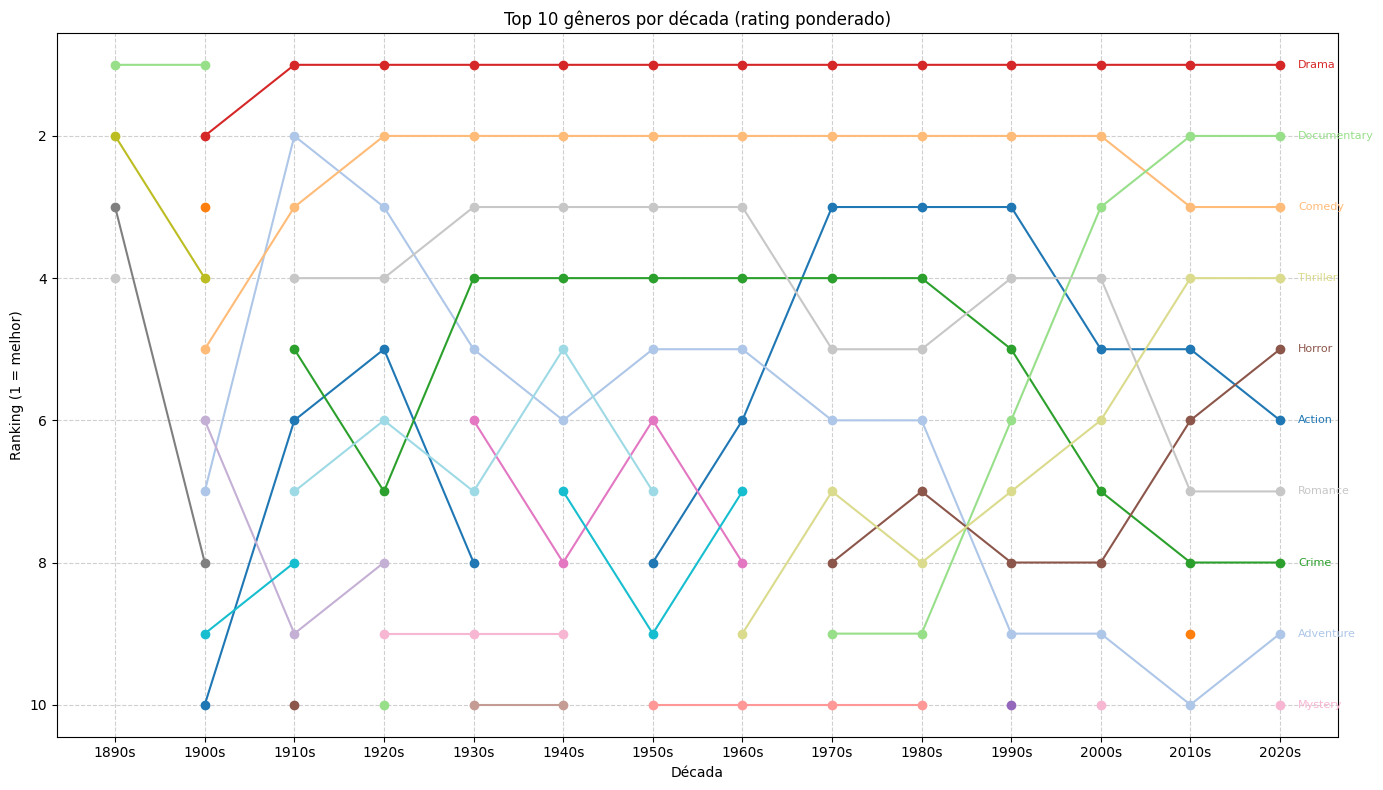

In [12]:
df_top10 = df_final[df_final["rank"] <= 10]

df_pivot = df_top10.pivot(index="decade", columns="genres", values="rank")

num_genres = len(df_pivot.columns)
cmap = plt.cm.get_cmap("tab20", num_genres)

plt.figure(figsize=(14,8))
texts = []
for i, genero in enumerate(df_pivot.columns):
    plt.plot(range(len(df_pivot.index)), df_pivot[genero],
             marker="o",
             color=cmap(i))

    # Last point position (numeric index)
    xpos = len(df_pivot.index) - 1
    last_value = df_pivot.iloc[-1][genero]

    # Add text label
    texts.append(
        plt.text(xpos + 0.2, last_value, genero,
                 color=cmap(i), va="center", fontsize=8)
    )

plt.gca().invert_yaxis()
plt.title("Top 10 gêneros por década (rating ponderado)")
plt.xlabel("Década")
plt.ylabel("Ranking (1 = melhor)")
plt.grid(True, linestyle="--", alpha=0.6)

# Use numeric positions for x-axis ticks but show decade labels
plt.xticks(range(len(df_pivot.index)), df_pivot.index)

plt.tight_layout()
plt.show()
